In [44]:
import requests
from bs4 import BeautifulSoup
import openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
move2022 = pd.read_csv("2022.csv")
move2021 = pd.read_csv("2021.csv")
move2020 = pd.read_csv("2020.csv")
move2019 = pd.read_csv("2019.csv")
move2018 = pd.read_csv("2018.csv")
move2017 = pd.read_csv("2017.csv")
a = move2022["이동자"].iloc[1:6].values
b = move2021["이동자"].iloc[1:6].values
c = move2020["이동자"].iloc[1:6].values
d = move2019["이동자"].iloc[1:6].values
e = move2018["이동자"].iloc[1:6].values
f = move2017["이동자"].iloc[1:6].values
print(move2020)
print(c)


   성별(1)  연령별(1)      총계    진입자     유지자    이동자   미등록자
0     총계      총계  24,832  3,967  17,191  3,674  3,493
1    NaN  15-29세   3,888  1,246   1,846    796    931
2    NaN  30-39세   5,100    671   3,707    722    531
3    NaN  40-49세   5,853    636   4,455    763    540
4    NaN  50-59세   5,693    660   4,252    781    660
5    NaN  60세 이상   4,298    754   2,931    612    831
6     남자      총계  14,180  1,976  10,022  2,182  1,764
7    NaN  15-29세   1,999    675     918    406    486
8    NaN  30-39세   3,037    349   2,223    465    259
9    NaN  40-49세   3,413    282   2,673    458    255
10   NaN  50-59세   3,258    303   2,486    470    325
11   NaN  60세 이상   2,473    368   1,723    382    439
12    여자      총계  10,652  1,991   7,169  1,492  1,730
13   NaN  15-29세   1,890    572     929    389    445
14   NaN  30-39세   2,063    322   1,484    256    273
15   NaN  40-49세   2,440    353   1,782    304    285
16   NaN  50-59세   2,435    357   1,766    312    335
17   NaN  60세 이상   1,825    

In [46]:
index = ["15-29세","30-39세","40-49세","50-59세","60세 이상"]
data = {
    "2017" : f,
    "2018" : e,
    "2019" : d,
    "2020" : c,
    "2021" : b,
    "2022" : a

}
move = pd.DataFrame(data, index=index)
move

,2017,2018,2019,2020,2021,2022
15-29세,860,863,835,796,831,872
30-39세,812,816,774,722,812,858
40-49세,873,865,835,763,804,828
50-59세,803,837,836,781,833,865
60세 이상,526,564,596,612,681,736


In [47]:
move_trans = move.transpose()
move_trans

,15-29세,30-39세,40-49세,50-59세,60세 이상
2017,860,812,873,803,526
2018,863,816,865,837,564
2019,835,774,835,836,596
2020,796,722,763,781,612
2021,831,812,804,833,681
2022,872,858,828,865,736


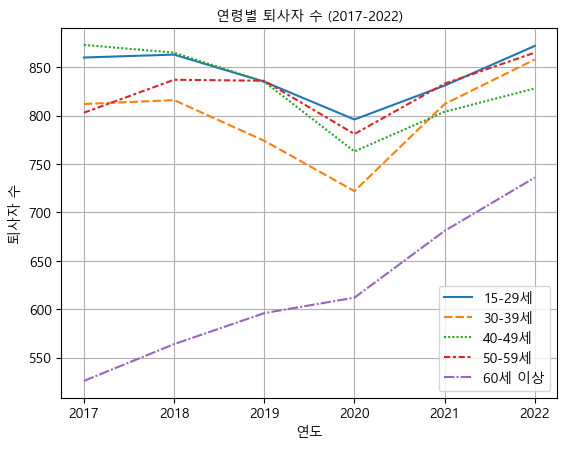

In [48]:
move = move_trans.astype(int)

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

sns.lineplot(data=move)
plt.title("연령별 퇴사자 수 (2017-2022)", fontsize=10)
plt.xlabel("연도", fontsize=10)
plt.ylabel("퇴사자 수", fontsize=10)
# plt.legend(labels=move_trans.columns, loc="best")
plt.grid(True)
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16056\2696088130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=move.index, y=move['15-29세'], palette="coolwarm")


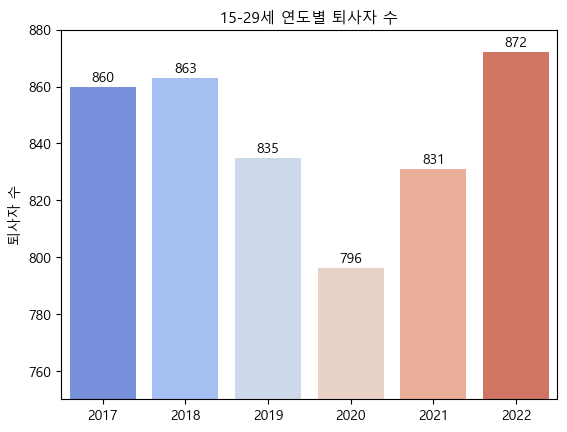

In [49]:
# sns.barplot(x=move.index,y=move['15-29세'])
# plt.xlabel("Year")
# plt.ylim(0,1000)

sns.barplot(x=move.index, y=move['15-29세'], palette="coolwarm")
plt.ylim(750, 880)  # 차이를 강조하기 위해 Y축 범위 조정

# 데이터 라벨 추가
for index, value in enumerate(move['15-29세']):
    plt.text(index, value + 2, f'{value}', ha='center', fontsize=10)

plt.title("15-29세 연도별 퇴사자 수", fontsize=11)
plt.xlabel("")
plt.ylabel("퇴사자 수", fontsize=10)
plt.show()

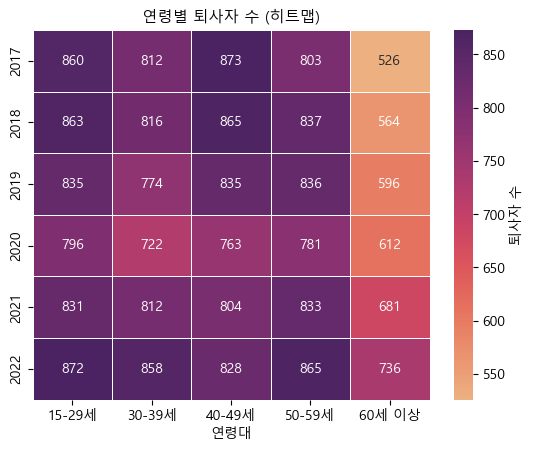

In [50]:
sns.heatmap(data=move, annot=True, fmt="d", cmap="flare", linewidths=0.5, cbar_kws={'label': '퇴사자 수'})
plt.title("연령별 퇴사자 수 (히트맵)", fontsize=11)
plt.xlabel("연령대", fontsize=10)
plt.ylabel("", fontsize=10)
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16056\745678180.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(years, trend, "r--", label="추세선 (회귀 분석)", color="#0057b7")  # 추세선 추가


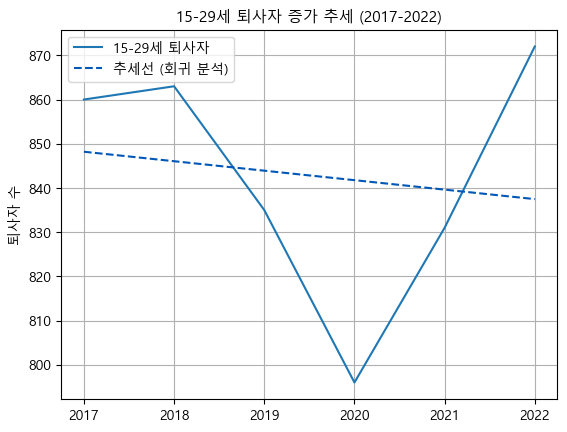

In [51]:
from numpy import polyfit

# 청년층 데이터
years = move.index.astype(int)
y = move["15-29세"]

# 추세선 계산
coef = polyfit(years, y, 1)  # 1차 회귀 (y = ax + b)
trend = coef[0] * years + coef[1]

# 그래프 그리기
sns.lineplot(x=years, y=y, color="#1f77b4", linewidth=1.5, label="15-29세 퇴사자")
plt.plot(years, trend, "r--", label="추세선 (회귀 분석)", color="#0057b7")  # 추세선 추가
plt.title("15-29세 퇴사자 증가 추세 (2017-2022)", fontsize=11)
plt.xlabel("")
plt.ylabel("퇴사자 수", fontsize=10)
plt.legend(loc="best")
plt.grid(True)
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16056\1872488811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=move.index, y=move["증감률(%)"], palette="coolwarm")


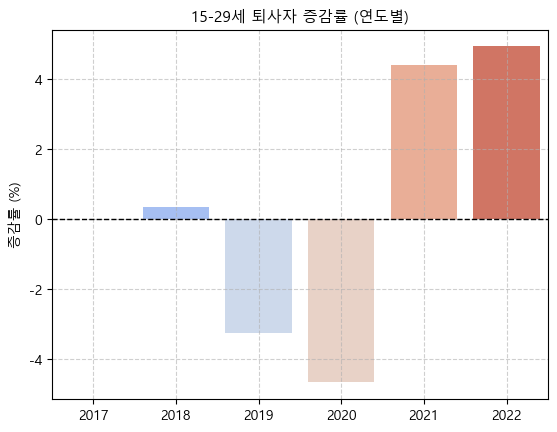

In [52]:
# 연도별 증가/감소율 계산
move["증감률(%)"] = move["15-29세"].pct_change() * 100  # 퍼센트 변화율
move["증감률(%)"] = move["증감률(%)"].fillna(0)  # 첫 번째 값 NaN 처리

# 증감률 그래프
sns.barplot(x=move.index, y=move["증감률(%)"], palette="coolwarm")
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # 기준선
plt.title("15-29세 퇴사자 증감률 (연도별)", fontsize=11)
plt.xlabel("")
plt.ylabel("증감률 (%)", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [53]:
aa = move2022["진입자"].iloc[1:6].values
bb = move2021["진입자"].iloc[1:6].values
cc = move2020["진입자"].iloc[1:6].values
dd = move2019["진입자"].iloc[1:6].values
ee = move2018["진입자"].iloc[1:6].values
ff = move2017["진입자"].iloc[1:6].values
aa = np.array([int(x.replace(",", "")) for x in aa])
a = np.array([int(x) for x in a])
bb = np.array([int(x.replace(",", "")) for x in bb])
b = np.array([int(x) for x in b])
cc = np.array([int(x.replace(",", "")) for x in cc])
c = np.array([int(x) for x in c])
print(ff)
print(f)
print(c)



[1372  630  640  617  597]
[860 812 873 803 526]
[796 722 763 781 612]


In [54]:
index = ["15-29세","30-39세","40-49세","50-59세","60세 이상"]
data = {
    "2017" : ff/f,
    "2018" : ee/e,
    "2019" : dd/d,
    "2020" : cc/c,
    "2021" : bb/b,
    "2022" : aa/a

}
move_p = pd.DataFrame(data, index=index)
move_p = move_p.round(2).transpose()
move_p

,15-29세,30-39세,40-49세,50-59세,60세 이상
2017,1.60,0.78,0.73,0.77,1.13
2018,1.59,0.81,0.76,0.77,0.99
2019,1.61,0.79,0.71,0.73,1.26
2020,1.57,0.93,0.83,0.85,1.23
2021,1.64,0.80,0.76,0.78,1.11
2022,1.50,0.75,0.70,0.69,1.05


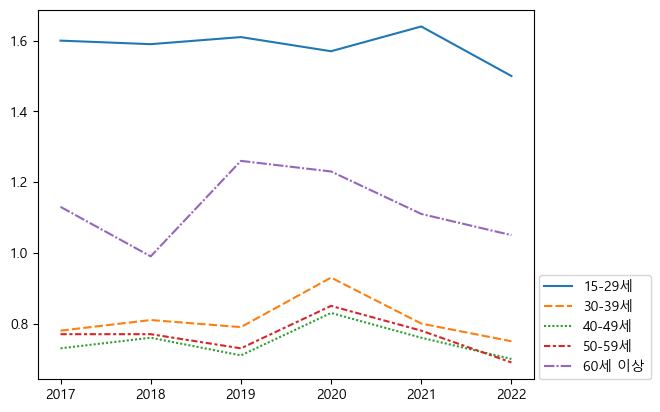

In [55]:
sns.lineplot(data=move_p)
plt.legend(loc=(1.01,0))


In [56]:
company = pd.read_excel("직장만족도.xlsx")
company

,통계표명:,성별 및 연령집단별 일자리만족도,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,단위:,%,NaN,NaN,NaN,NaN
1,NaN,NaN,2017.0,2019.0,2021.0,2023.0
2,전체,NaN,27.7,32.3,35.0,35.1
3,성,남성,27.8,32.1,34.0,34.5
4,NaN,여성,27.5,32.5,36.4,35.8
5,연령집단,20세 미만,28.2,33.3,42.3,35.4
6,NaN,20-29세,27.3,32.9,35.8,37.5
7,NaN,30-39세,31.1,34.3,36.2,34.7
8,NaN,40-49세,29.7,33.8,39.2,36.9
9,NaN,50-59세,24.8,31.1,34.7,34.3


      15-29세  30-39세  40-49세  50-59세  60세 이상
2017   27.75    31.1    29.7    24.8    20.9
2019   33.10    34.3    33.8    31.1    26.5
2021   39.05    36.2    39.2    34.7    25.1
2023   36.45    34.7    36.9    34.3    31.4


Text(0, 1, '[단위 %]')

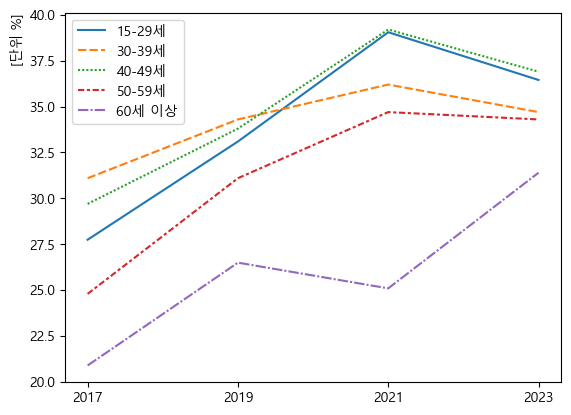

In [60]:
good = company.iloc[5:11,2:].values
good[0]
index = ["2017","2019","2021","2023"]
data = {
    "15-29세" : (good[0]+good[1])/2,
    "30-39세" : good[2],
    "40-49세" : good[3],
    "50-59세" : good[4],
    "60세 이상" : good[5] 
}
company_good = pd.DataFrame(data=data, index=index)
print(company_good)
sns.lineplot(data=company_good)
plt.ylabel('[단위 %]', loc='top')

In [61]:
aaa = move2022["총계"].iloc[1:6].values
bbb = move2021["총계"].iloc[1:6].values
ccc = move2020["총계"].iloc[1:6].values
ddd = move2019["총계"].iloc[1:6].values
eee = move2018["총계"].iloc[1:6].values
fff = move2017["총계"].iloc[1:6].values

index = ["15-29세","30-39세","40-49세","50-59세","60세 이상"]
data = {
    "2017" : fff,
    "2018" : eee,
    "2019" : ddd,
    "2020" : ccc,
    "2021" : bbb,
    "2022" : aaa

}
total = pd.DataFrame(data, index=index)
total = total.transpose()
total



,15-29세,30-39세,40-49세,50-59세,60세 이상
2017,3921,5085,5854,5220,3299
2018,3970,5138,5822,5434,3473
2019,3985,5074,5798,5560,3942
2020,"3,888","5,100","5,853","5,693","4,298"
2021,"3,972","5,117","5,898","5,882","4,622"
2022,"3,944","5,160","5,934","6,002","5,018"


2017    29.425
2019    33.700
2021    37.625
dtype: float64


Text(0, 1, '[단위 %]')

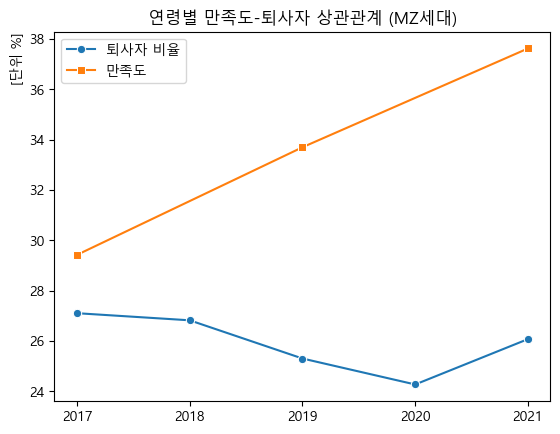

In [62]:
t = total['15-29세'].astype(str)
t = np.array([int(x.replace(",", "")) for x in t])

tt = total['30-39세'].astype(str)
tt = np.array([int(x.replace(",", "")) for x in tt])

x1 = move_trans['15-29세'].astype(int)/(t-move_trans['15-29세'].astype(int)) *100
x2 = move_trans['30-39세'].astype(int)/(t-move_trans['30-39세'].astype(int)) *100
x = (x1.iloc[:-1] + x2.iloc[:-1])/2
y = (company_good['15-29세'].iloc[:-1] + company_good['30-39세'].iloc[:-1])/2
print(y)

years=[2017,2018,2019,2020,2021,2022]
sns.lineplot(data=x, label="퇴사자 비율", marker='o')
sns.lineplot(data=y, label="만족도", marker='s')
plt.title('연령별 만족도-퇴사자 상관관계 (MZ세대)')
plt.ylabel("[단위 %]", loc='top')



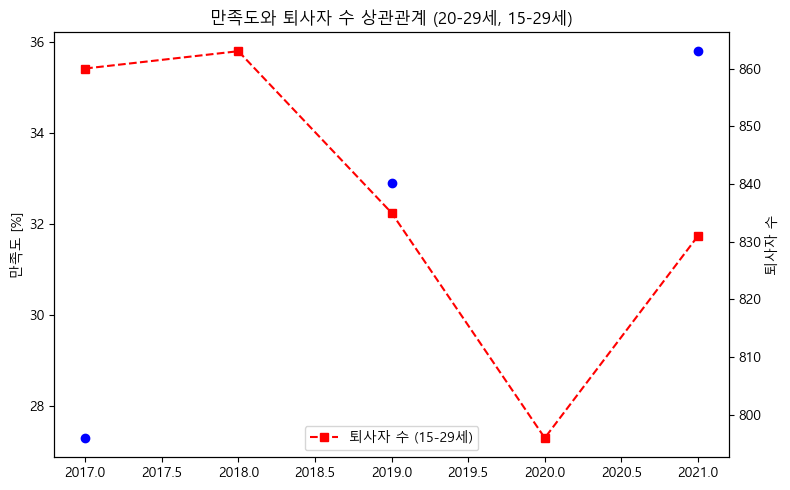

In [73]:
t=total['15-29세'].astype(str)
t
t = np.array([int(x.replace(",", "")) for x in t])
x=move_trans['15-29세'].iloc[:-1]
y=[27.3, np.nan, 32.9, np.nan, 35.8]
x
years = [2017, 2018, 2019, 2020, 2021]
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8,5))

# 만족도 데이터 (왼쪽 y축)
ax1.plot(years, y, color='blue', marker='o', label='만족도 (20-29세)', linestyle='-')
ax1.set_ylabel('만족도 [%]')


# 퇴사자 수 데이터 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(years, x, color='red', marker='s', linestyle='--', label='퇴사자 수 (15-29세)')
ax2.set_ylabel('퇴사자 수')


# 제목 및 축 설정
plt.title('만족도와 퇴사자 수 상관관계 (20-29세, 15-29세)')
ax1.set_xlabel('')

# 범례 추가
plt.legend(loc='lower center')

# 그래프 출력
plt.tight_layout()
plt.show()


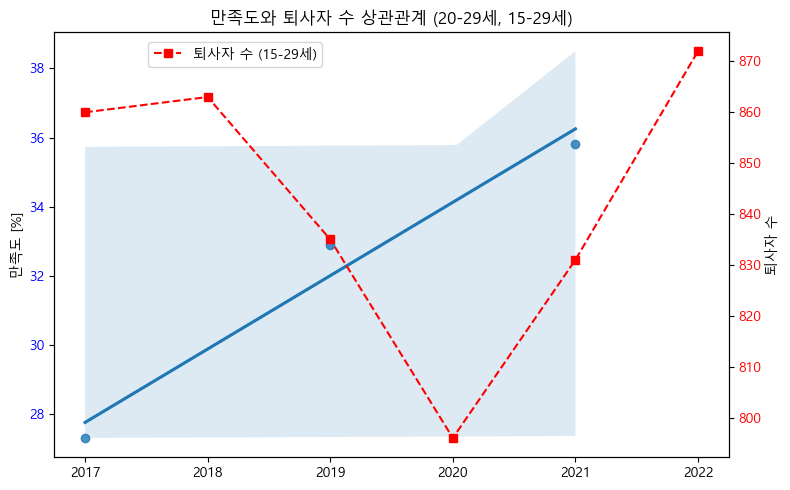

In [42]:
t=total['15-29세'].astype(str)
t
t = np.array([int(x.replace(",", "")) for x in t])
x=move_trans['15-29세']
y=[27.3, np.nan, 32.9, np.nan, 35.8, np.nan]
x
years = [2017, 2018, 2019, 2020, 2021, 2022]
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(8,5))

# 만족도 데이터 (왼쪽 y축)
sns.regplot(x=years,y=y)
ax1.set_ylabel('만족도 [%]')
ax1.tick_params(axis='y', labelcolor='blue')

# 퇴사자 수 데이터 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(years, x, color='red', marker='s', linestyle='--', label='퇴사자 수 (15-29세)')
ax2.set_ylabel('퇴사자 수')
ax2.tick_params(axis='y', labelcolor='red')

# 제목 및 축 설정
plt.title('만족도와 퇴사자 수 상관관계 (20-29세, 15-29세)')
ax1.set_xlabel('')

# 범례 추가
fig.legend(loc='upper center', bbox_to_anchor=(0.3, 0.92), ncol=2)

# 그래프 출력
plt.tight_layout()
plt.show()
